In [1]:
# 필요한 라이브러리 설치 및 Import
!pip install tensorflow keras numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
# 1. 데이터 준비 및 전처리

# 데이터 로드
df = pd.read_csv('bbc-text.csv')

# 텍스트와 레이블 분리
texts = df['text']
labels = df['category']

# 토큰화
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# 패딩
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 훈련/검증 분할
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# 출력
print("단어 집합 크기:", len(tokenizer.word_index))
print("패딩된 시퀀스 형태:", padded_sequences.shape)
print("훈련 샘플 개수:", len(X_train))
print("검증 샘플 개수:", len(X_val))


단어 집합 크기: 29726
패딩된 시퀀스 형태: (2225, 200)
훈련 샘플 개수: 1780
검증 샘플 개수: 445


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4044 - loss: 1.5745 - val_accuracy: 0.5708 - val_loss: 1.3761
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6577 - loss: 1.2473 - val_accuracy: 0.8697 - val_loss: 0.7967
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.6001 - val_accuracy: 0.9169 - val_loss: 0.3931
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9669 - loss: 0.2558 - val_accuracy: 0.9393 - val_loss: 0.2562
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.1339 - val_accuracy: 0.9393 - val_loss: 0.2141
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0803 - val_accuracy: 0.9393 - val_loss: 0.1912
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0455 - val_accuracy: 0.9303 - val_loss: 0.1957
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0340 - val_accuracy: 0.9438 - val_loss

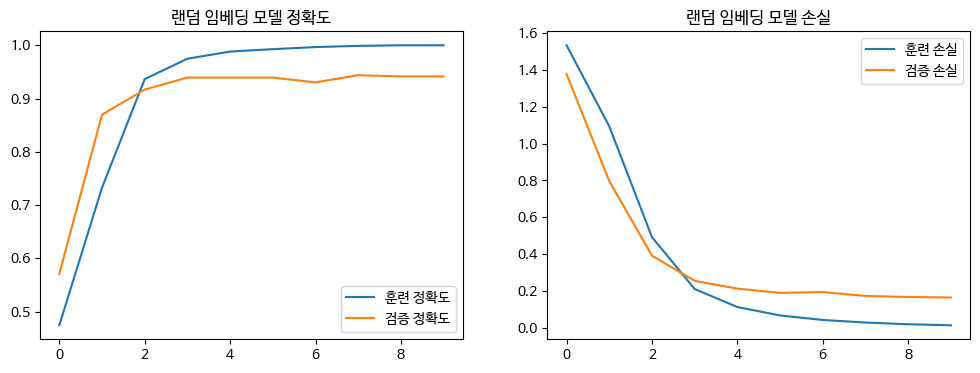

In [4]:
# 2. 랜덤 초기화 임베딩을 이용한 텍스트 분류
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import matplotlib.pyplot as plt

# 모델 구성
model_random = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# 모델 컴파일
model_random.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# 모델 훈련
history_random = model_random.fit(X_train, y_train,
                                  epochs=10,
                                  batch_size=32,
                                  validation_data=(X_val, y_val))

# 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_random.history['accuracy'], label='훈련 정확도')
plt.plot(history_random.history['val_accuracy'], label='검증 정확도')
plt.title('랜덤 임베딩 모델 정확도')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_random.history['loss'], label='훈련 손실')
plt.plot(history_random.history['val_loss'], label='검증 손실')
plt.title('랜덤 임베딩 모델 손실')
plt.legend()
plt.show()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4838 - loss: 1.5053 - val_accuracy: 0.6899 - val_loss: 1.2603
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7551 - loss: 1.1404 - val_accuracy: 0.8404 - val_loss: 0.9391
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8836 - loss: 0.8410 - val_accuracy: 0.8831 - val_loss: 0.6832
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8988 - loss: 0.6001 - val_accuracy: 0.8944 - val_loss: 0.5328
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.4580 - val_accuracy: 0.8989 - val_loss: 0.4323
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9293 - loss: 0.3728 - val_accuracy: 0.9011 - val_loss: 0.3773
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9177 - loss: 0.3351 - val_accuracy: 0.9056 - val_loss: 0.3397
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9360 - loss: 0.2710 - val_accuracy: 0.9079 - val_loss

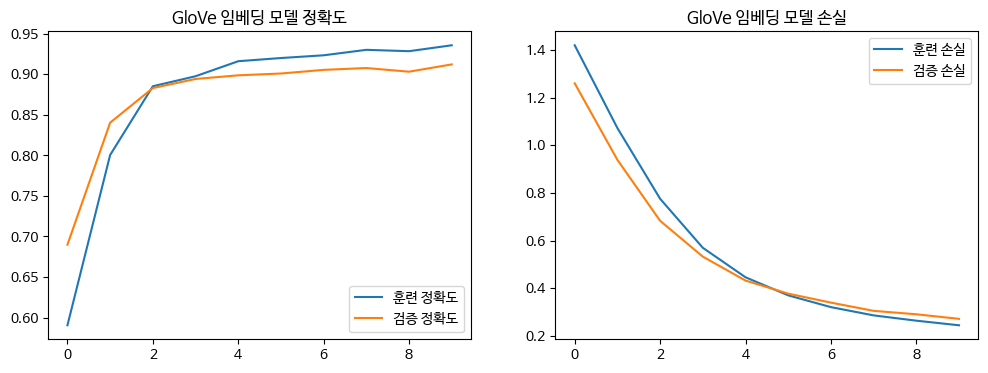

In [5]:
# 3. 사전 학습된 워드 임베딩 적용
import io
import numpy as np

# GloVe 임베딩 로드
def load_glove_embeddings(file_path):
    embeddings_dict = {}
    with io.open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

# GloVe 임베딩 로드 (파일 경로는 실제 Colab 환경에 맞게 조정)
glove_embeddings = load_glove_embeddings('/content/glove.6B.100d.txt')

# 임베딩 매트릭스 생성
embedding_dim = 100
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# GloVe 임베딩 모델 구성
model_glove = Sequential([
    Embedding(input_dim=num_words,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_length,
              trainable=False),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# 모델 컴파일 및 훈련
model_glove.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_glove = model_glove.fit(X_train, y_train,
                                epochs=10,
                                batch_size=32,
                                validation_data=(X_val, y_val))

# 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glove.history['accuracy'], label='훈련 정확도')
plt.plot(history_glove.history['val_accuracy'], label='검증 정확도')
plt.title('GloVe 임베딩 모델 정확도')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_glove.history['loss'], label='훈련 손실')
plt.plot(history_glove.history['val_loss'], label='검증 손실')
plt.title('GloVe 임베딩 모델 손실')
plt.legend()
plt.show()

In [7]:
# 4. 신경망 언어 모델 (PyTorch로 구현)
import torch
import torch.nn as nn
import torch.optim as optim

class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LanguageModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 4, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 언어 모델 데이터 준비
def create_language_model_dataset(sequences, window_size=5):
    X, y = [], []
    for seq in sequences:
        for i in range(len(seq) - window_size):
            X.append(seq[i:i+window_size-1])
            y.append(seq[i+window_size-1])
    return torch.tensor(X, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# 데이터 준비
X_lm, y_lm = create_language_model_dataset(padded_sequences)

# 모델 하이퍼파라미터
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_dim = 64

# 모델, 손실 함수, 옵티마이저 초기화
model_lm = LanguageModel(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lm.parameters())

# 훈련 루프
num_epochs = 5
for epoch in range(num_epochs):
    model_lm.train()
    total_loss = 0

    for i in range(0, len(X_lm), 128):
        batch_X = X_lm[i:i+128]
        batch_y = y_lm[i:i+128]

        optimizer.zero_grad()
        outputs = model_lm(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(X_lm):.4f}')

Epoch [1/5], Loss: 0.0488
Epoch [2/5], Loss: 0.0435
Epoch [3/5], Loss: 0.0414
Epoch [4/5], Loss: 0.0400
Epoch [5/5], Loss: 0.0390


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


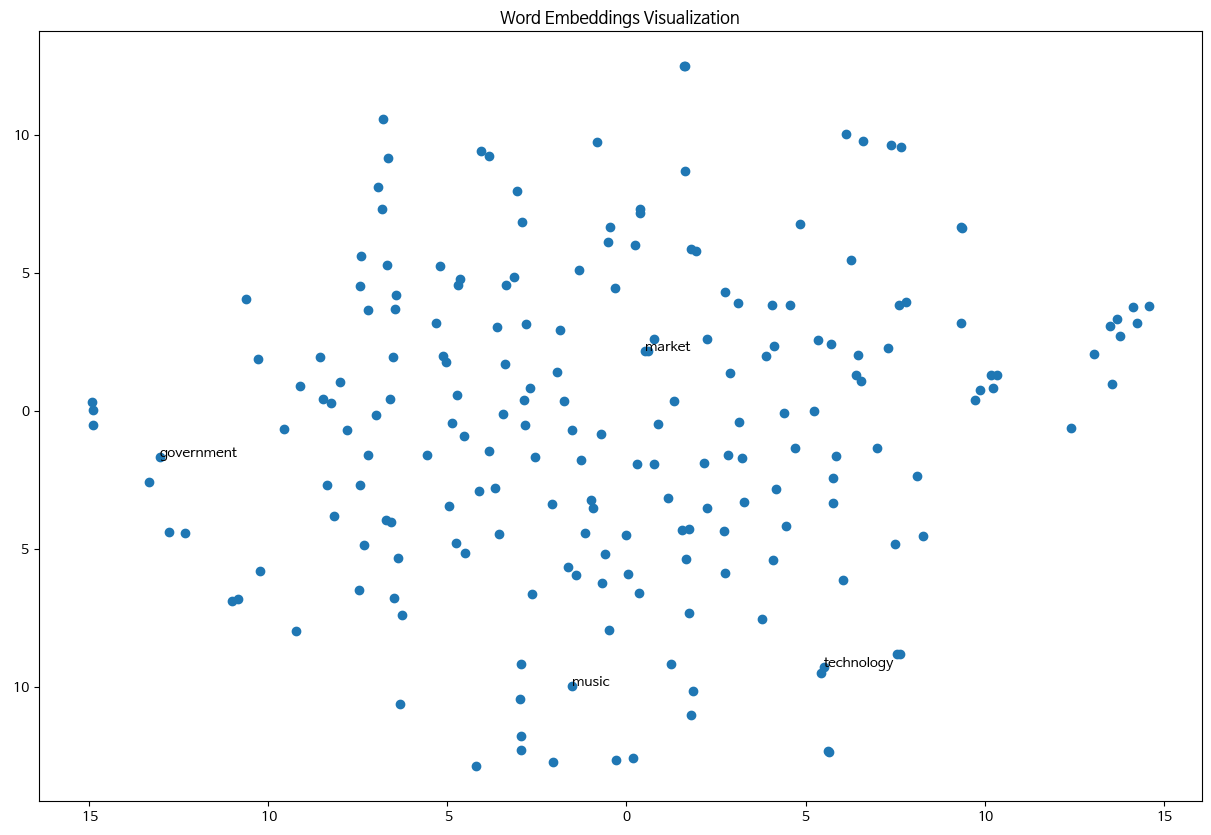

In [8]:
# 5. 임베딩 벡터 시각화
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 상위 200개 단어 벡터 추출
top_words = sorted(tokenizer.word_index.items(), key=lambda x: x[1])[:200]
top_word_indices = [word[1] for word in top_words]
top_word_vectors = embedding_matrix[top_word_indices]

# TSNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(top_word_vectors)

# 시각화
plt.figure(figsize=(15, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# 일부 단어 라벨링
words_to_label = ['government', 'market', 'team', 'technology', 'music']
for word in words_to_label:
    if word in tokenizer.word_index:
        idx = tokenizer.word_index[word]
        if idx in top_word_indices:
            vec_idx = top_word_indices.index(idx)
            plt.annotate(word, (reduced_vectors[vec_idx, 0], reduced_vectors[vec_idx, 1]))

plt.title('Word Embeddings Visualization')
plt.show()